# CNN Intro

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
from tensorflow.keras.datasets.cifar10 import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = load_data()

X_train.shape=(50000, 32, 32, 3)), X_test.shape=(10000, 32, 32, 3)
y_train.shape=(50000,)), y_test.shape=(10000,)


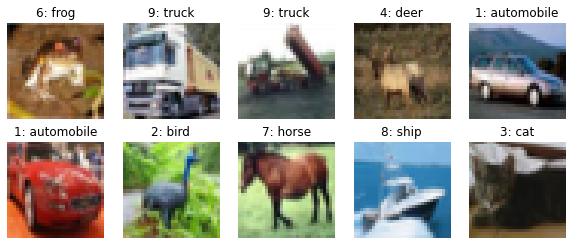

In [16]:
print(f"{X_train.shape=}), {X_test.shape=}")
y_train, y_test = y_train.ravel(), y_test.ravel()
print(f"{y_train.shape=}), {y_test.shape=}")

labels = ["airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck"]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")
    ax.axis("off")

In [17]:
print(f"{X_train.min()=}, {X_train.max()=}")
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

X_train.min()=0, X_train.max()=255


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam


In [19]:
def CNN_model(learning_rate=.001, drop_rate=.5, kernels=[32, 64]):
    adam = Adam(learning_rate = learning_rate)

    model = Sequential(name="CNN_model")

    # The convolutional layers
    for number_kernel in kernels:
        conv_layer = Conv2D(number_kernel, 
                            kernel_size=(3, 3), 
                            activation="relu", 
                            kernel_initializer="he_normal", 
                            input_shape=X_train.shape[1:])
        
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    
    # MLP layers
    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(10, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"])

    return model

model = CNN_model()
model.summary()    

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2304)              0 

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5)

model.fit(
    scaled_X_train, 
    y_train, 
    epochs=100, 
    callbacks=[early_stopper], 
    validation_split=1/5
)

Epoch 1/100
1250/1250 [==============================] - 90s 71ms/step - loss: 1.4799 - acc: 0.4633 - val_loss: 1.2000 - val_acc: 0.5616
Epoch 2/100
1250/1250 [==============================] - 83s 66ms/step - loss: 1.1647 - acc: 0.5851 - val_loss: 1.0328 - val_acc: 0.6392
Epoch 3/100
1250/1250 [==============================] - 65s 52ms/step - loss: 1.0339 - acc: 0.6331 - val_loss: 0.9472 - val_acc: 0.6713
Epoch 4/100
1250/1250 [==============================] - 57s 46ms/step - loss: 0.9399 - acc: 0.6673 - val_loss: 0.9064 - val_acc: 0.6870
Epoch 5/100
1250/1250 [==============================] - 56s 45ms/step - loss: 0.8619 - acc: 0.6956 - val_loss: 0.8592 - val_acc: 0.7013
Epoch 6/100
1250/1250 [==============================] - 76s 61ms/step - loss: 0.7871 - acc: 0.7246 - val_loss: 0.8412 - val_acc: 0.7076
Epoch 7/100
1250/1250 [==============================] - 85s 68ms/step - loss: 0.7359 - acc: 0.7437 - val_loss: 0.8437 - val_acc: 0.7122
Epoch 8/100
1250/1250 [==================

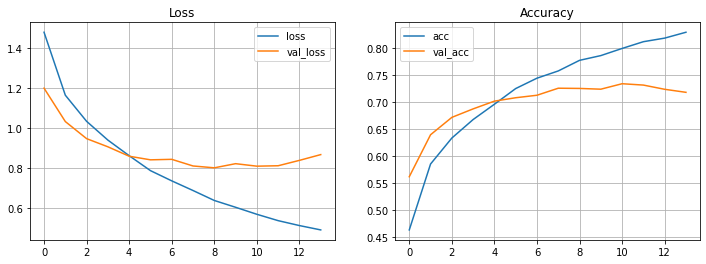

In [21]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

metrics = pd.DataFrame(model.history.history)
plot_metrics(metrics)

### Hyperparameter tuning

In [22]:
def evaluate_model(**kwargs):
    model=CNN_model(**kwargs)
    model.fit(
        scaled_X_train, 
        y_train, 
        validation_split = 1/5, 
        epochs = 6
    )

    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_acc"].iloc[-1]
    return val_acc

In [23]:
dropout_acc = {}

for drop_rate in np.arange(.1, .6, .1):
    drop_rate = np.round(drop_rate, 1)
    dropout_acc[drop_rate] = evaluate_model(drop_rate=drop_rate)

Epoch 1/6
1250/1250 [==============================] - 90s 71ms/step - loss: 1.4448 - acc: 0.4841 - val_loss: 1.1711 - val_acc: 0.5921
Epoch 2/6
1250/1250 [==============================] - 84s 67ms/step - loss: 1.0865 - acc: 0.6186 - val_loss: 1.0749 - val_acc: 0.6263
Epoch 3/6
1250/1250 [==============================] - 80s 64ms/step - loss: 0.9167 - acc: 0.6792 - val_loss: 0.9727 - val_acc: 0.6641
Epoch 4/6
1250/1250 [==============================] - 82s 66ms/step - loss: 0.7822 - acc: 0.7270 - val_loss: 0.9342 - val_acc: 0.6779
Epoch 5/6
1250/1250 [==============================] - 85s 68ms/step - loss: 0.6635 - acc: 0.7692 - val_loss: 0.9108 - val_acc: 0.6972
Epoch 6/6
1250/1250 [==============================] - 81s 65ms/step - loss: 0.5595 - acc: 0.8038 - val_loss: 0.9872 - val_acc: 0.6838
Epoch 1/6
1250/1250 [==============================] - 80s 63ms/step - loss: 1.4341 - acc: 0.4889 - val_loss: 1.2232 - val_acc: 0.5650
Epoch 2/6
1250/1250 [==============================] - 

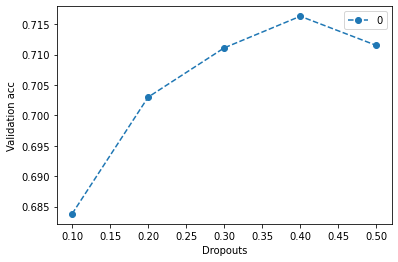

In [27]:
pd.DataFrame(dropout_acc.values(), index = dropout_acc.keys()).plot(
    xlabel="Dropouts", ylabel="Validation acc", style="--o");

### When finished

- Train on all training data (train and validation) with the tuned parameters
- Evaluate on testing data